In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = os.getcwd()
print(DIR)



df = pd.read_csv(DIR + "/2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.columns

/Users/lukedobrovic/Data/CampaignContributions


Index(['committee_id', 'committee_name', 'report_year', 'report_type',
       'image_number', 'line_number', 'transaction_id', 'file_number',
       'committee_name.1', 'entity_type', 'entity_type_desc',
       'unused_contbr_id', 'contributor_prefix', 'contributor_name',
       'recipient_committee_type', 'recipient_committee_org_type',
       'recipient_committee_designation', 'contributor_first_name',
       'contributor_middle_name', 'contributor_last_name',
       'contributor_suffix', 'contributor_street_1', 'contributor_street_2',
       'contributor_city', 'contributor_state', 'contributor_zip',
       'contributor_employer', 'contributor_occupation', 'contributor_id',
       'receipt_type', 'receipt_type_desc', 'receipt_type_full', 'memo_code',
       'memo_code_full', 'contribution_receipt_date',
       'contribution_receipt_amount', 'contributor_aggregate_ytd',
       'candidate_id', 'candidate_name', 'candidate_first_name',
       'candidate_last_name', 'candidate_middle_na

In [4]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [5]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

In [6]:
df_selections.committee_name.unique()
#Biden Victory Fund, Biden for President, Biden Action Fund are funds with Biden in name

array(['WARREN FOR PRESIDENT, INC.', '314 ACTION FUND',
       'JOSH GOTTHEIMER FOR CONGRESS', 'PETERS FOR MICHIGAN',
       'BYRNE FOR SENATE, INC.', 'SETH MOULTON FOR AMERICA, INC.',
       'DOUG JONES FOR SENATE COMMITTEE', 'ACTBLUE',
       'JEFF MERKLEY FOR OREGON', 'MARK KELLY FOR SENATE',
       'GILLIBRAND 2020', 'MAX ROSE FOR CONGRESS', 'COLLINS FOR SENATOR',
       'NATIONAL DEMOCRATIC TRAINING COMMITTEE PAC',
       'ALEXANDRIA OCASIO-CORTEZ FOR CONGRESS',
       'MIKE JOHNSTON FOR US SENATE', 'THE MARKEY COMMITTEE',
       'TAMMY FOR ILLINOIS', 'MCCREADY FOR CONGRESS',
       'NANCY PELOSI VICTORY FUND', 'MJ FOR TEXAS',
       'CAROLYN FOR CONGRESS', 'SCOTT COOPER FOR CONGRESS',
       'WHITEHOUSE FOR SENATE',
       'AMERICAN SOCIETY OF ANESTHESIOLOGISTS POLITICAL ACTION COMMITTEE (ASA PAC)',
       'BILL FOSTER FOR CONGRESS', 'AB PAC', 'DE BLASIO 2020',
       'CHC BOLD PAC', 'REPUBLICAN NATIONAL COMMITTEE',
       'PERRY GERSHON FOR CONGRESS', 'MICHAEL BLAKE FOR CONGRESS

In [7]:
df_biden = df_selections[df_selections["committee_name"].str.contains("BIDEN")]

df_biden.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("TRUMP")]

df_trump.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name
0,3507,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-05-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
1,3508,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-06-20,35.00,NYPH/COLUMBIA UNIVERSITY,RN,GISELA,NaN,MINIER
2,5285,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-07-20,35.00,NYPH/COLUMBIA UNIVERSITY,REGISTERED NURSE,GISELA,NaN,MINIER
3,5287,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-08-20,35.00,NYPH/COLUMBIA UNIVERSITY,REGISTERED NURSE,GISELA,NaN,MINIER
4,5288,"DONALD J. TRUMP FOR PRESIDENT, INC.",2019-09-20,35.00,NYPH/COLUMBIA UNIVERSITY,REGISTERED NURSE,GISELA,NaN,MINIER
...,...,...,...,...,...,...,...,...,...
88,40973,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-07,18.75,COLUMBIA UNIVERSITY,ACCOUNTANT,KIM,M,SANTORO
89,40974,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-07,0.50,COLUMBIA UNIVERSITY MEDICAL CENTER,LAB SCIENTIST,RAFAEL,NaN,FERRER
90,40976,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-04-30,93.75,COLUMBIA SOUTHERN UNIVERSITY,PROFESSOR,CHRIS,NaN,WIKE
91,40977,"DONALD J. TRUMP FOR PRESIDENT, INC.",2020-08-09,26.25,COLUMBIA UNIVERSITY,TECHNOLOGIST,ANDREW,NaN,MADEJCZYK


In [8]:
df_biden = df_biden.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Committees w/ TRUMP in their name since announcement of 2020 Biden Candidacy')

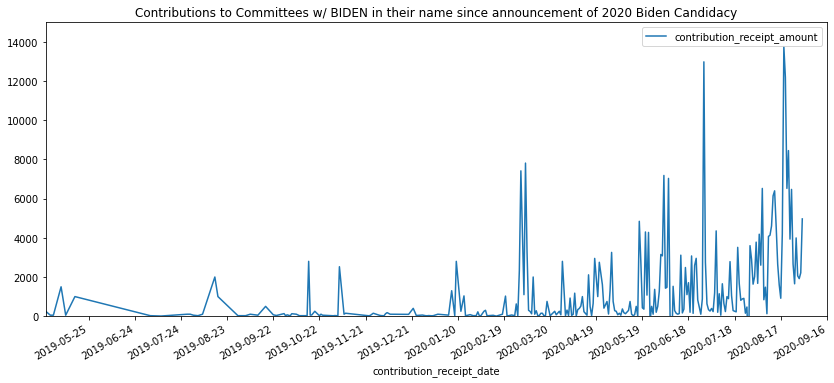

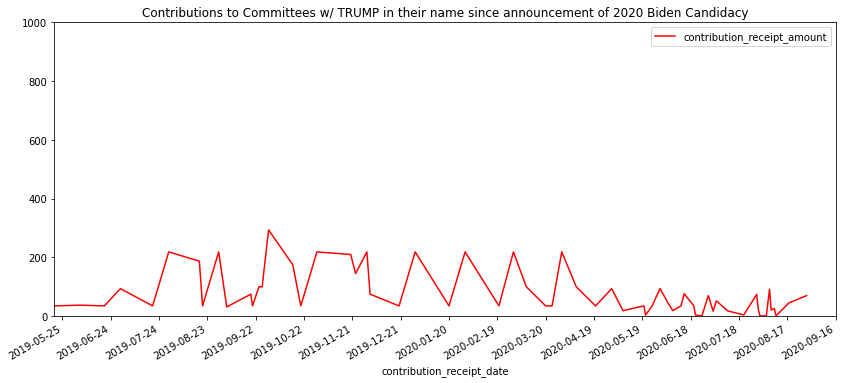

In [9]:
from datetime import datetime, timedelta
t = np.arange(datetime(2019,5,25), datetime(2020,10,1), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_biden.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 15000])
ax1.set_title("Contributions to Committees w/ BIDEN in their name since announcement of 2020 Biden Candidacy")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 1000])
ax2.set_title("Contributions to Committees w/ TRUMP in their name since announcement of 2020 Biden Candidacy")

In [10]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,4,ACTBLUE,578798.45
1,29,BIDEN FOR PRESIDENT,309759.15
2,32,BLUE TIDE NY-1 LLC,172000.00
3,26,BERNIE 2020,66544.79
4,83,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,66277.50


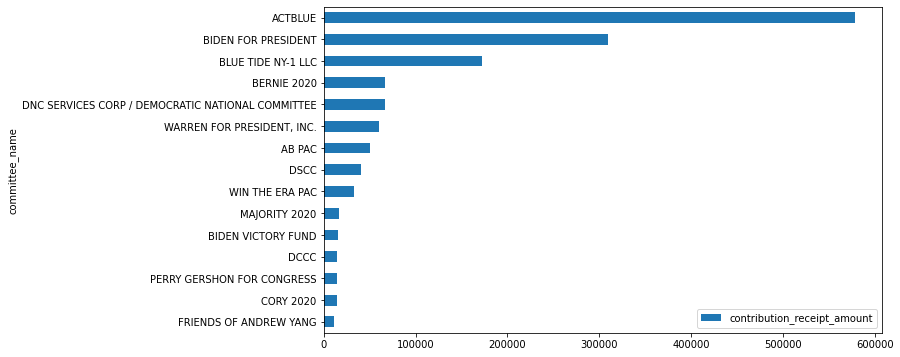

In [11]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

In [26]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
occupations = df_occ["contributor_occupation"].value_counts()

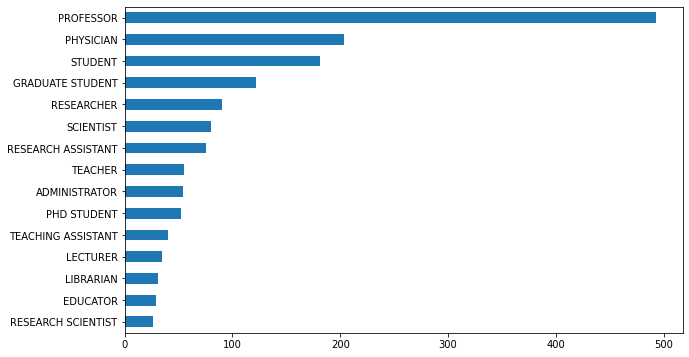

In [28]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()